__Sales Predictor__

Raw Data

In [5]:
import pandas as pd
import numpy as np

In [6]:
df_stores = pd.read_csv("data/stores.csv")
df_oil = pd.read_csv("data/oil.csv")
df_txn = pd.read_csv("data/transactions.csv")
df_train = pd.read_csv("data/train.csv")
df_holidays = pd.read_csv("data\holidays_events.csv")


Dropping Transfered holidays 

In [7]:
df_holidays = df_holidays[df_holidays["transferred"] != True]

In [8]:
df_holidays["transferred"].value_counts()

transferred
False    338
Name: count, dtype: int64

In [9]:
df_holidays.drop("transferred",axis=1,inplace=True)

In [10]:
df_holidays.head()

,date,type,locale,locale_name,description
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba


Dropping Description

In [11]:
df_holidays.drop("description",axis=1,inplace=True)
df_holidays.head()

,date,type,locale,locale_name
0,2012-03-02,Holiday,Local,Manta
1,2012-04-01,Holiday,Regional,Cotopaxi
2,2012-04-12,Holiday,Local,Cuenca
3,2012-04-14,Holiday,Local,Libertad
4,2012-04-21,Holiday,Local,Riobamba


In [12]:
df_txn.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [13]:
df_oil.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


Adding All dates in range and interpolating in oil data


In [14]:

df_oil.head()


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [15]:
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_oil.set_index('date',inplace=True)
df_oil = df_oil.reindex(pd.date_range(start=df_oil.index.min(), end=df_oil.index.max(), freq='D'))
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].interpolate()

In [16]:
df_oil.head()

,dcoilwtico
2013-01-01,NaN
2013-01-02,93.140000
2013-01-03,92.970000
2013-01-04,93.120000
2013-01-05,93.146667


In [17]:
df_oil.isnull().sum()


dcoilwtico    1
dtype: int64

In [18]:
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].interpolate(limit_direction='both')


In [19]:
df_oil.isnull().sum()

dcoilwtico    0
dtype: int64

In [20]:
df_oil.head()

,dcoilwtico
2013-01-01,93.140000
2013-01-02,93.140000
2013-01-03,92.970000
2013-01-04,93.120000
2013-01-05,93.146667


In [21]:
import matplotlib.pyplot as plt


In [25]:
a=df_oil.index
a

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-22', '2017-08-23', '2017-08-24', '2017-08-25',
               '2017-08-26', '2017-08-27', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', length=1704, freq='D')

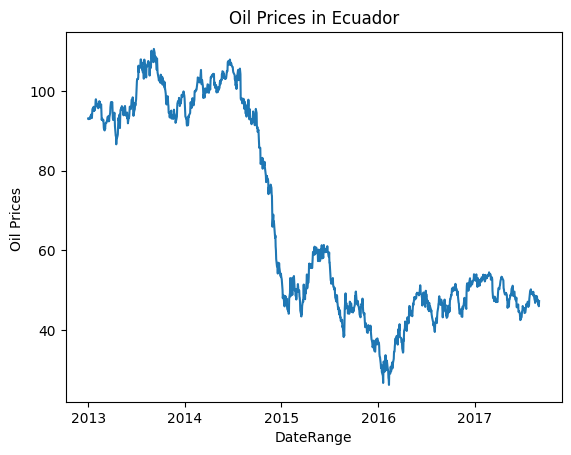

In [28]:
plt.xlabel("DateRange")
plt.ylabel("Oil Prices ")
plt.title("Oil Prices in Ecuador")
plt.plot(a,df_oil.dcoilwtico)

In [30]:
df_oil_raw = pd.read_csv("data/oil.csv")
df_oil_raw.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


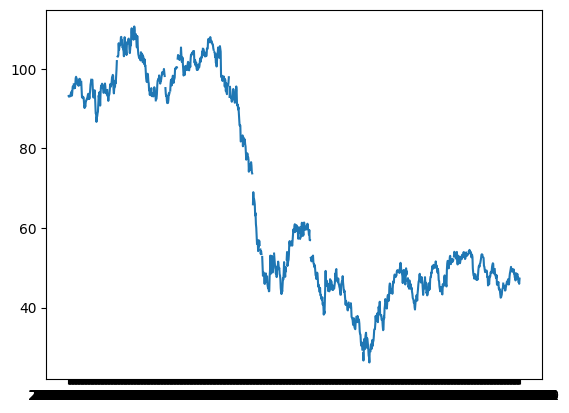

In [31]:
plt.plot(df_oil_raw.date,df_oil_raw.dcoilwtico)

In [45]:
df_oil

,level_0,index,date
0,0,2013-01-01,93.140000
1,1,2013-01-02,93.140000
2,2,2013-01-03,92.970000
3,3,2013-01-04,93.120000
4,4,2013-01-05,93.146667
...,...,...,...
1699,1699,2017-08-27,46.816667
1700,1700,2017-08-28,46.400000
1701,1701,2017-08-29,46.460000
1702,1702,2017-08-30,45.960000


In [46]:
df_oil.drop('level_0',axis=1)

,index,date
0,2013-01-01,93.140000
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.146667
...,...,...
1699,2017-08-27,46.816667
1700,2017-08-28,46.400000
1701,2017-08-29,46.460000
1702,2017-08-30,45.960000


In [48]:
df_oil.columns=['index','date','dcoilwtico']
df_oil.head()

,index,date,dcoilwtico
0,0,2013-01-01,93.140000
1,1,2013-01-02,93.140000
2,2,2013-01-03,92.970000
3,3,2013-01-04,93.120000
4,4,2013-01-05,93.146667


In [ ]:
df.head()

In [49]:
df_oil.head()

,index,date,dcoilwtico
0,0,2013-01-01,93.140000
1,1,2013-01-02,93.140000
2,2,2013-01-03,92.970000
3,3,2013-01-04,93.120000
4,4,2013-01-05,93.146667


In [52]:
df_oil.drop('index',axis=1,inplace=True)

In [53]:
df_oil.head()

,date,dcoilwtico
0,2013-01-01,93.140000
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.146667


In [54]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [64]:
df_train.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
dtype: object

In [65]:
df_oil['date'] = pd.to_datetime(df_oil['date'])
df_train['date'] = pd.to_datetime(df_train['date'])


In [66]:
df_train_new= pd.merge(df_train,df_oil,on='date')
df_train_new.head()

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,93.14
1,1,2013-01-01,1,BABY CARE,0.0,0,93.14
2,2,2013-01-01,1,BEAUTY,0.0,0,93.14
3,3,2013-01-01,1,BEVERAGES,0.0,0,93.14
4,4,2013-01-01,1,BOOKS,0.0,0,93.14


In [68]:
df_txn.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


In [69]:
df_txn.dtypes

date            object
store_nbr        int64
transactions     int64
dtype: object

In [70]:
df_train_new.dtypes

id                      int64
date           datetime64[ns]
store_nbr               int64
family                 object
sales                 float64
onpromotion             int64
dcoilwtico            float64
dtype: object

In [ ]:
df_train_new=pd.merge(df_train_new,df_txn,on='store_nbr')

MemoryError: Unable to allocate 34.6 GiB for an array with shape (4639595136,) and data type int64

__EXIT__